In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [275]:
data = pd.read_csv('PL_player_1920.csv')
df = data.iloc[:,1:]

## position 

In [276]:
position_list = list()
for i in range(276):
    po=df['position'][i].split(',')
    for j in range(len(po)):
        if po[j] not in position_list:
            position_list.append(po[j])

In [277]:
multi_position_list = list()
for i in range(276):
    po=df['position'][i]
    if po not in multi_position_list:
            multi_position_list.append(po)

In [278]:
def position_class(pos):
    position = list()
    for i in pos:
        if 'FW' in i:
            if ('AM' in i) or ('M' in i):
                position.append('AM/FW')
            else:
                position.append('FW')
        elif 'AM' in i:
            position.append('AM')
        elif 'M' in i:
            if 'D' in i:
                position.append('DM/WB')
            else :  position.append('M')
        elif 'D' in i:
            position.append('D')
        elif 'GK' in i:
            position.append('GK')
        else :
            position.append('??')
    return(position)

In [279]:
multi_position_class = list()
for i in range(49):
    po=position_class(multi_position_list)[i]
    multi_position_class.append(po)

In [280]:
df.position=position_class(data.position)
goal_assist= df['Goals']+df['Assists']
df['goal_assist'] = goal_assist

In [281]:
df = df.sort_values('position')

# PL 손흥민 in 전체선수

Text(0.5, 0, 'Rating')

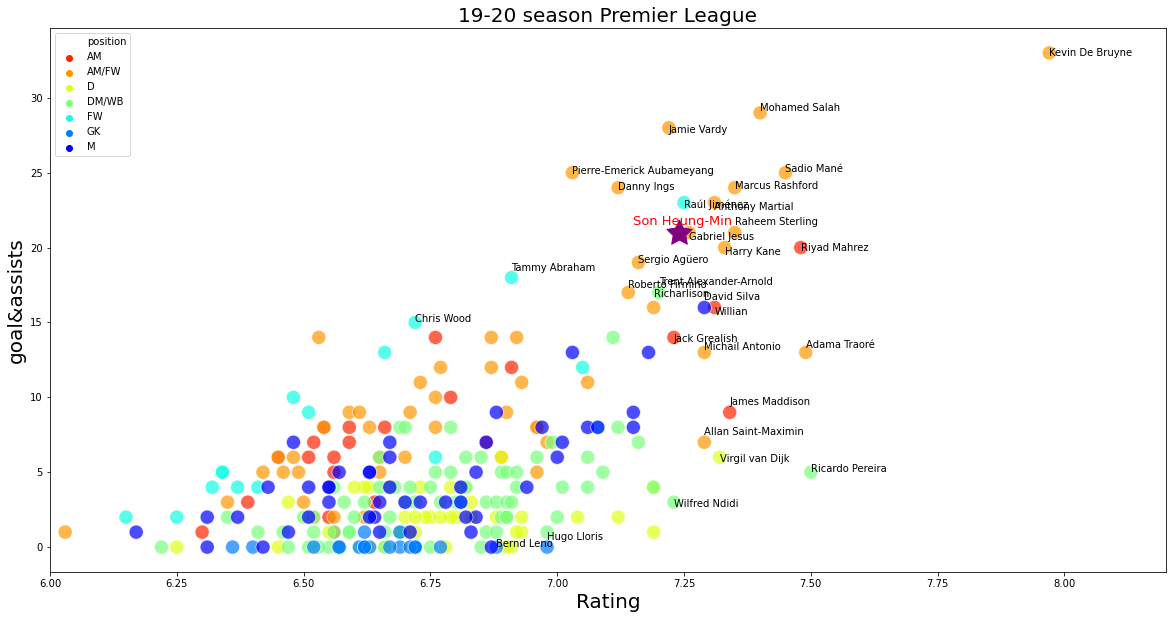

In [9]:
fig = plt.figure(figsize = (20,10))
sns.scatterplot(x='Rating', y='goal_assist', hue='position', palette = 'jet_r', data=df, s=200, alpha=0.7)
for i in range(len(df['player_name'])):
    if df['player_name'][i] == 'Son Heung-Min':
        plt.text((df['Rating'][i]-0.09),(df['goal_assist'][i]+0.5),df['player_name'][i], color='red', 
                 fontsize = 13)
    elif df['player_name'][i] in ['Willian', 'Gabriel Jesus','Anthony Martial','Harry Kane']:
        plt.text((df['Rating'][i]),(df['goal_assist'][i]-0.5),df['player_name'][i])
    elif df['player_name'][i] in ['Raheem Sterling', 'Trent Alexander-Arnold', 'David Silva']:
        plt.text((df['Rating'][i]),(df['goal_assist'][i]+0.5),df['player_name'][i])
    elif (df['goal_assist'][i] >= 15) or (df['Rating'][i]>7.2): 
        plt.text((df['Rating'][i]),(df['goal_assist'][i]+np.random.normal(0,0.35)),df['player_name'][i])
    elif (df['position'][i]=='GK') and (df['Rating'][i]>6.8):
        plt.text((df['Rating'][i]),(df['goal_assist'][i]+np.random.normal(0,0.35)),df['player_name'][i])
temp = df[df['player_name']=='Son Heung-Min']
plt.scatter(temp['Rating'], temp['goal_assist'], marker=(5, 1), s=700, color='purple')
plt.title('19-20 season Premier League', fontsize=20)
plt.legend(loc='upper left')
plt.xlim(6,8.2)
plt.ylabel('goal&assists',fontsize=20)
plt.xlabel('Rating',fontsize=20)
#fig.savefig('son_19.20_PL.png')

# 손흥민 in AM/FW 

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [311]:
df_ =  df[df['position'] != 'GK']

In [312]:
df_offence = df[df['position'].isin(['AM','AM/FW','FW'])]
df_pass = df_
df_defence = df[df['position'].isin(['D','DM/WB','M'])]
df_dribble = df_

In [313]:
df.columns

Index(['player_name', 'team_number', 'team_name', 'age', 'position', 'Apps',
       'Mins', 'Assists', 'KeyP', 'AvgP', 'PS%', 'Crosses', 'LongB', 'ThrB',
       'Rating', 'sub', 'Goals', 'Yel', 'Red', 'SpG', 'AerialsWon', 'MoM',
       'Dribble', 'Fouled', 'Off', 'Disp', 'UnsTch', 'Tackles', 'Inter',
       'Fouls', 'Offsides', 'Clear', 'Drb', 'Blocks', 'OwnG', 'goal_assist'],
      dtype='object')

In [314]:
c_offence = ['Goals','SpG','AerialsWon','Rating']
c_pass = ['Assists','KeyP','AvgP','PS%','Crosses','LongB','ThrB','Rating']
c_dribble = ['Dribble','Fouled','Disp','UnsTch','Rating']
c_defence = ['Inter','Fouls','Clear','Drb','Blocks','OwnG','Rating','AerialsWon']

In [315]:
lr_offence = LinearRegression()
scaler = MinMaxScaler()
temp = df_offence[c_offence]
scaler.fit(df[c_offence])
temp=scaler.transform(temp)
temp2 = scaler.transform(df[c_offence])
X = temp[:,range(len(c_offence)-1)]
X2 = temp2[:,range(len(c_offence)-1)]
y = temp[:,len(c_offence)-1]
lr_offence.fit(X,y)
a=lr_offence.predict(X2)
a=np.log(a)
df['shot']=49*(a-min(a))/(max(a)-min(a))+50

In [316]:
lr_defence = LinearRegression()
scaler = MinMaxScaler()
temp = df_defence[c_defence]
scaler.fit(df[c_defence])
temp=scaler.transform(temp)
temp2 = scaler.transform(df[c_defence])
X = temp[:,range(len(c_defence)-1)]
X2 = temp2[:,range(len(c_defence)-1)]
y = temp[:,len(c_defence)-1]
lr_defence.fit(X,y)
a=lr_defence.predict(X2)
a=np.log(49*(a-min(a))/(max(a)-min(a))+50)
df['defence']=49*(a-min(a))/(max(a)-min(a))+50

In [317]:
lr_pass = LinearRegression()
scaler = MinMaxScaler()
temp = df_pass[c_pass]
scaler.fit(df[c_pass])
temp=scaler.transform(temp)
temp2 = scaler.transform(df[c_pass])
X = temp[:,range(len(c_pass)-1)]
X2 = temp2[:,range(len(c_pass)-1)]
y = temp[:,len(c_pass)-1]
lr_pass.fit(X,y)
a=lr_pass.predict(X2)
a=np.log(a)
a=np.log(49*(a-min(a))/(max(a)-min(a))+50)
df['pas']=49*(a-min(a))/(max(a)-min(a))+50

In [318]:
lr_dribble = LinearRegression()
scaler = MinMaxScaler()
temp = df_dribble[c_dribble]
scaler.fit(df[c_dribble])
temp = scaler.transform(temp)
temp2 = scaler.transform(df[c_dribble])
X = temp[:,range(len(c_dribble)-1)]
X2 = temp2[:,range(len(c_dribble)-1)]
y = temp[:,len(c_dribble)-1]
lr_dribble.fit(X,y)
a=lr_dribble.predict(X2)
a=np.log(a-0.2)
a=np.log(49*(a-min(a))/(max(a)-min(a))+50)
df['dribble']=49*(a-min(a))/(max(a)-min(a))+50

In [321]:
df[['player_name','position','app']].sort_values('app',ascending=False).head(50)

,player_name,position,app
34,Harry Maguire,D,99.000000
210,David de Gea,GK,99.000000
257,Jordan Pickford,GK,99.000000
169,Mat Ryan,GK,98.482577
123,Nick Pope,GK,98.482577
49,Declan Rice,DM/WB,98.482577
10,Virgil van Dijk,D,98.482577
235,Conor Coady,DM/WB,98.482577
189,Rui Patrício,GK,98.482577
140,Martin Dubravka,GK,98.482577


Text(0.5, 1.0, '패스')

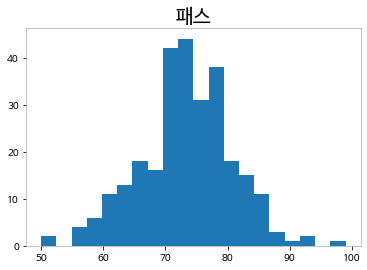

In [455]:
plt.hist(df['pas'],bins=20)
plt.title('패스', fontsize=20)

Text(0.5, 1.0, '드리블')

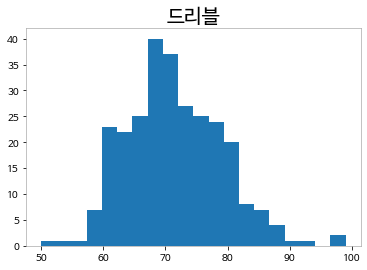

In [453]:
plt.hist(df['dribble'],bins=20)
plt.title('드리블', fontsize=20)

Text(0.5, 1.0, '공격')

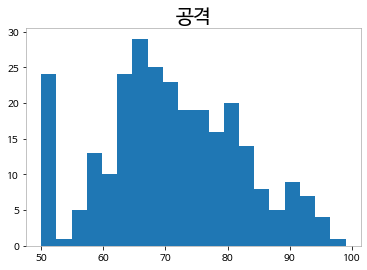

In [454]:
plt.hist(df['shot'],bins=20)
plt.title('공격', fontsize=20)

Text(0.5, 1.0, '수비')

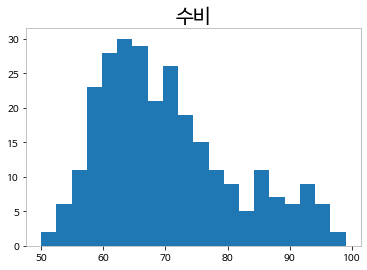

In [451]:
plt.hist(df['defence'],bins=20)
plt.title('수비',fontsize=20)

Text(0.5, 1.0, '출전시간')

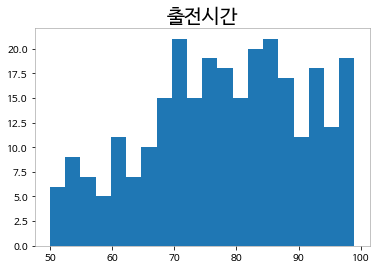

In [450]:
plt.hist(df['app'],bins=20)
plt.title('출전시간',fontsize=20)

In [320]:
a=df['Mins']
df['app']=49*(a-min(a))/(max(a)-min(a))+50

In [396]:
data=df[['player_name','pas','shot','dribble','app','defence']]

# Plots a radar chart.

In [272]:
from math import pi

In [292]:
 
# Set data
data = pd.DataFrame({
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 

In [294]:
data

,var1,var2,var3,var4,var5
0,38.0,29,8,7,28
1,1.5,10,39,31,15
2,30.0,9,23,33,32
3,4.0,34,24,14,14


In [297]:
values=data.loc[0].values.flatten().tolist()

In [301]:
values += values[:1]

In [434]:
# number of variable
def plot_radar(data, data2):
    categories=list(data)
    N = len(categories)
    values=data.values.flatten().tolist()
    values += values[:1]
    angles = [pi/2+((n-1) / float(N) * 2 * pi) for n in range(N)]
    angles += angles[:1]
    plt.figure(figsize=(7,7))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.set_rlabel_position(0)
    plt.yticks([50,60,70,80,90], ["50","60","70",'80','90'], color="grey", size=7)
    plt.ylim(30,100)
    ax.plot(angles, values, linewidth=1, linestyle='solid', label = '손흥민')
    ax.fill(angles, values, 'red', alpha=0.1)
    
    values=data2.values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label = '공격수 및 공격형 미드필더')
    ax.fill(angles, values, 'b', alpha=0.1)
    
    
    ax.set_xticklabels(['패스','공격','드리블','출전시간','수비'],fontsize=20,color='black')
    plt.legend(loc='upper right')
    plt.fontsize=20
    fig.savefig('son.png')
    return(0)

In [398]:
target = data[data['player_name']=='Son Heung-Min'].iloc[:,1:]

In [399]:
target

,pas,shot,dribble,app,defence
18,85.351199,91.45465,81.590202,82.390707,64.868928


In [371]:
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/NanumBarunGothic.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [406]:
d = data.copy()

In [408]:
d['position']=df['position']

In [418]:
target2=(data[d['position'].isin(['AM','FW','AM/FW'])].iloc[:,1:].median())

In [422]:
target3=(data.iloc[:,1:].median())

0

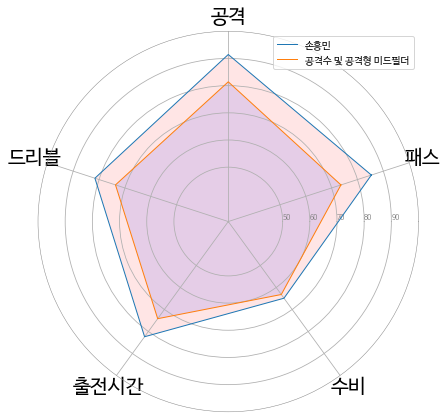

In [435]:
plot_radar(target,target2)

0

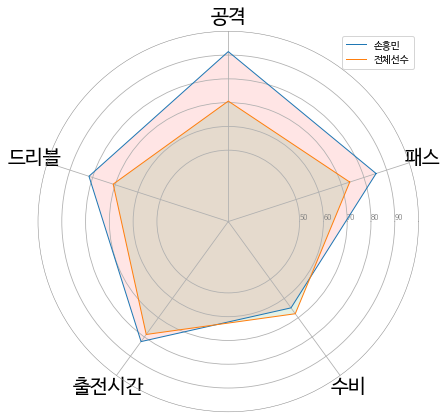

In [430]:
plot_radar(target,target3)

0

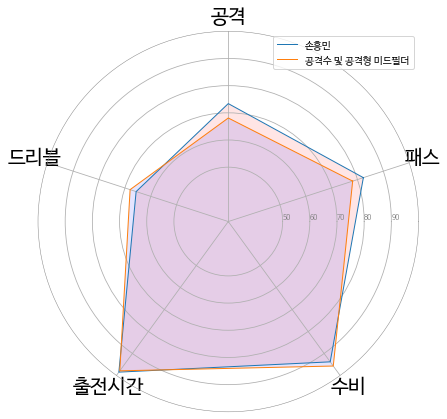

In [444]:
target4 = data[data['player_name']=='Virgil van Dijk'].iloc[:,1:]
target5 = data[data['player_name']=='Jonny Evans'].iloc[:,1:]
plot_radar(target4,target5)

In [440]:
data[data['pas']==99]

,player_name,pas,shot,dribble,app,defence
0,Kevin De Bruyne,99.0,92.42127,79.634062,87.789159,75.972617


In [ ]:
Virgil van Dijk